In [1]:
import pathlib
import sys
import math
module_dir = pathlib.Path("").parent.resolve()
root_dir = module_dir.parent
source_dir = root_dir.joinpath("source")
asvlite_wrapper_dir = root_dir.joinpath("dependency", "ASVLite", "wrapper", "cython")
sys.path.insert(0, str(source_dir))
sys.path.insert(0, str(asvlite_wrapper_dir))

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Plot simulation results
Plot the results of simulating all segments of wave glider Benjamin. 
**Model used for simulation is thrust_tuning_lin_reg_4.joblib**

In [3]:
# from glider_thrust_factor import _Thrust_tuning
# import cProfile
# tuning = _Thrust_tuning()
# # tuning.tune_wg_thrust()
# tuning.run_benjamin()

In [4]:
output_dir = root_dir.joinpath(*"results/glider_thrust".split("/"))
benjamin_output_dir = output_dir.joinpath("benjamin")    
benjamin_output_file = benjamin_output_dir.joinpath("simulation_data.csv")
df = pd.read_csv(str(benjamin_output_file))

In [5]:
for i in range(len(df)):
    df.loc[i, "tuning_group"] = int(math.ceil(df.loc[i, "simulated_wave_height(m)"]))

In [6]:
df = df[(df["speed(knots)"] > 0.0) & (df["speed(knots)"] < 4)]

<Figure size 640x480 with 0 Axes>

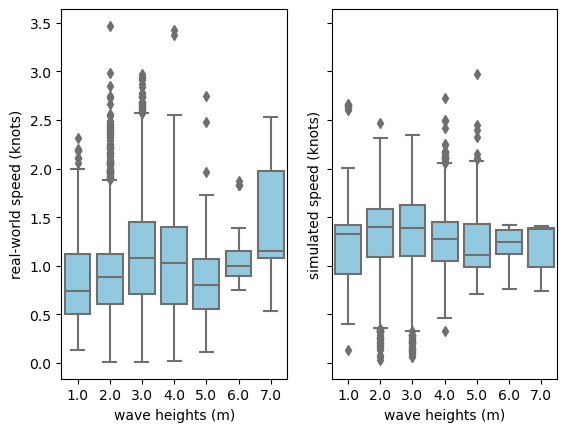

In [7]:
plt.figure()
fig, axes = plt.subplots(1, 2, sharey=True)
# fig.suptitle('Comparison of real-world and simulated speed of wave glider Benjamin')
sns.boxplot(ax=axes[0], data=df, y="speed(knots)", x="tuning_group", color='skyblue').set(xlabel="wave heights (m)", ylabel="real-world speed (knots)")
sns.boxplot(ax=axes[1], data=df, y="speed_simulated(knots)", x="tuning_group", color='skyblue').set(xlabel="wave heights (m)", ylabel="simulated speed (knots)")
boxplot_file = benjamin_output_dir.joinpath("boxplot_speed.png")
plt.savefig(str(boxplot_file), dpi=300)